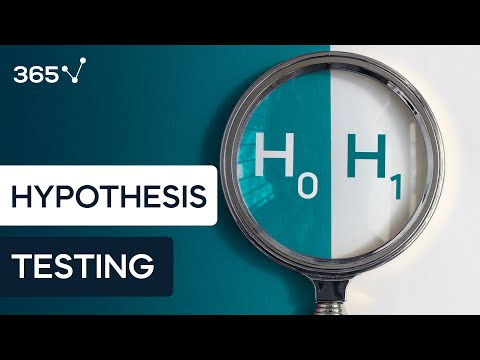

In [1]:
# Vid1

from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

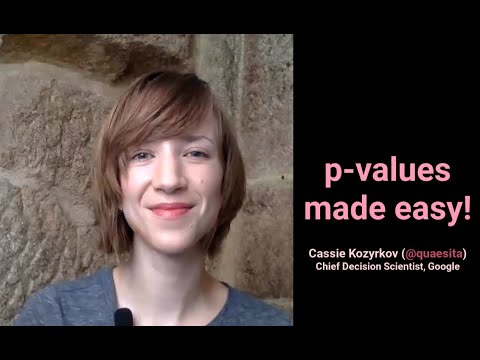

In [3]:
# Vid2

from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

1. The key difference between ideas that can and cannot be tested is that the idea you want to test must have available data to be able to compare to something else in order to be tested statistically. Additionally, it must be framed within a population parameter. A good null hypothesis is something that's straight to the point, specific and can be proven false. The null hypothesis is a general statement assuming that whatever is being tested has no effect or makes no difference and we are usually trying to reject this hypothesis. Contrarily, the alternative hypothesis is a different statement saying that something does have an effect or makes some difference.

   
2. When you do statistical tests, we a trying to get information about a certain population but we only have data from a random sample taken from that population. So, you use data from that sample to make inferences about the entire population.

   
3. The sampling distribution is a range of values that you would expect the test statistics to fall in if we kept testing random samples. By assuming the null is true, you can calculate the p-value to see how much data would occur inside or outside the null. So, assuming the null hypothesis is true all the time makes sense because its gives us like a neutral stance and based on how high or low the value is will tell us whether the data is actually "neutral" and agrees with the null or if it is "biased" and makes agreeing with the null look ridiculous.

   
4. The sampling distribution of the test statistic shows us a range of likely values, assuming the null is true. The definition of a p-value is the probability of obtaining a test statistic as or more extreme than the one observed if the null is true. So, the p-value being low means that there is a low chance that you will actually gte the data if the null is true. Since, its a low possibility of seeing that observed data then how can the null be true?


Observed right tilts: 80
Observed proportion of heads: 0.6452
P-value: 0.0007
Strength of evidence: Very strong evidence against the null hypothesis


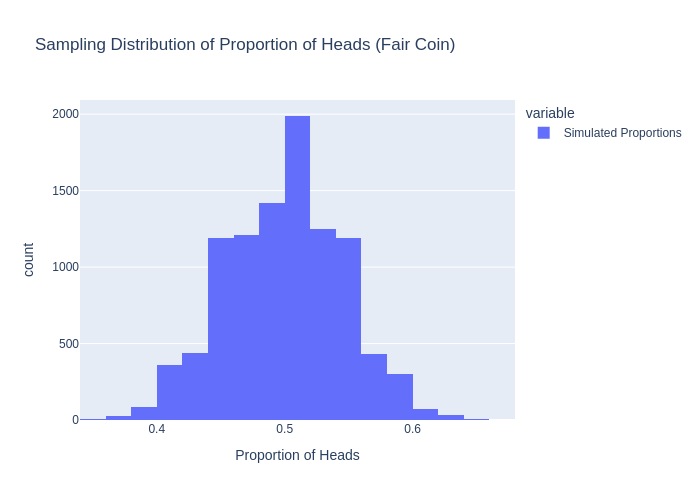

In [5]:
# Num. 5
import numpy as np
from scipy import stats
import plotly.express as px

# Set the parameters
n_couples = 124  # Total number of couples (coin flips)
observed_right_tilts = 80  # Observed number of right tilts
n_sample_simulations = 10000  # Number of samples to simulate
H0_p = 0.5  # Null hypothesis proportion for heads

# Simulate the samples
simulated_proportion_heads = np.zeros(n_sample_simulations)

for i in range(n_sample_simulations):
    # Simulate the coin flips
    n_coinflips = np.random.choice(['heads', 'tails'], p=[H0_p, 1 - H0_p], size=n_couples)
    simulated_proportion_heads[i] = (n_coinflips == 'heads').mean()

# Calculate the observed proportion of heads
observed_proportion_heads = observed_right_tilts / n_couples

# Calculate p-value
p_value = np.mean(simulated_proportion_heads >= observed_proportion_heads)

# Output results
print(f"Observed right tilts: {observed_right_tilts}")
print(f"Observed proportion of heads: {observed_proportion_heads:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the p-value based on evidence table
if p_value > 0.1:
    evidence = "No evidence against the null hypothesis"
elif 0.1 >= p_value > 0.05:
    evidence = "Weak evidence against the null hypothesis"
elif 0.05 >= p_value > 0.1:
    evidence = "Moderate evidence against the null hypothesis"
elif 0.01 >= p_value > 0.001:
    evidence = "Strong evidence against the null hypothesis"
else:
    evidence = "Very strong evidence against the null hypothesis"

print(f"Strength of evidence: {evidence}")

# Create histogram 
fig = px.histogram(simulated_proportion_heads, nbins=30, 
                   title='Sampling Distribution of Proportion of Heads (Fair Coin)',
                   labels={'value': 'Proportion of Heads', 'count': 'Frequency'})
fig.update_traces(name='Simulated Proportions')
fig.show(renderer="png")


6. You cannot definitively prove anything. Statistics involves making inferences from given data through logical reasoning. There is always going to be a possibility (even if its nearly zero) that something that something totally crazy could have happened to influence the data; though it's extremely unlikely. Therefore, a smaller p-value only tells us that it is more likely that the null is false, but it cannot say with 100% certianty that it is definitively false. Additionally, in the video, Cassie states that somebody could've put Fido in the garbage lid even though it was extremely unlikely. Also, even though Fido may have immense evidence making him look very guilty, that same unlikely chance of someone putting Fido in the garbage lid is still possible. Thus, you cannot say with 100% certainty that Fido is innocent or guilty but you can say, based on the evidence, that Fido is likely guilty as charged. Finally, the p-value being high or low does not prove, without a single doubt, the null is true/false. It can only convey how likely it is that the null is true/false.
   


In [10]:
# num. 7

import numpy as np
import pandas as pd
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Sample patient data for demonstration
# This should be replaced with your actual patient data
# patient_data = pd.DataFrame({'HealthScoreChange': np.random.uniform(-1, 1, 10)})  # Replace with actual data
np.random.seed(1)  # Seed for reproducibility

# Example patient data (you should use your actual data)
patient_data = pd.DataFrame({'HealthScoreChange': np.random.uniform(-1, 1, 100)})  # 100 sample data points

# Set parameters for the simulation
number_of_simulations = 10000  # Number of simulations
n_size = len(patient_data)  # Size of the patient data
IncreaseProportionSimulations_underH0random = np.zeros(number_of_simulations)

# Generate "random improvement" proportions assuming H0 (no effect) is true
for i in range(number_of_simulations):
    # Randomly simulate improvement where the null hypothesis is that there's no average effect
    random_improvement = np.random.choice([0, 1], size=len(patient_data), replace=True)

    # Store the mean, which is the proportion of "successes" (health score changes)
    IncreaseProportionSimulations_underH0random[i] = random_improvement.mean()

# Observed statistic (proportion of health score changes greater than zero)
observed_statistic = (patient_data.HealthScoreChange > 0).mean()
simulated_statistics = IncreaseProportionSimulations_underH0random

# One-sided condition: Check if simulated statistics are greater than the observed statistic
SimStats_as_or_more_extreme_than_ObsStat = \
    simulated_statistics >= observed_statistic  # For a one-tailed test

# Print the results
print('''Which simulated statistics are "as or more extreme"
than the observed statistic? (of ''', observed_statistic, ')', sep="")

# Create a DataFrame to show results
results_df = pd.DataFrame({'(Simulated) Statistic': simulated_statistics,
                           '>= ' + str(observed_statistic) + ' ?': ['>= ' + str(observed_statistic) + ' ?'] * number_of_simulations, 
                           '"as or more extreme"?': SimStats_as_or_more_extreme_than_ObsStat})

print(results_df)

# Calculate the p-value for the one-tailed test
p_value = SimStats_as_or_more_extreme_than_ObsStat.sum() / number_of_simulations
print("Number of Simulations: ", number_of_simulations, "\n\n",
      "Number of simulated statistics (under HO)\n",
      'that are "as or more extreme" than the observed statistic: ',
      SimStats_as_or_more_extreme_than_ObsStat.sum(), "\n\n",
      'p-value\n(= simulations "as or more extreme" / total simulations): ', p_value, sep="")



Which simulated statistics are "as or more extreme"
than the observed statistic? (of 0.49)
      (Simulated) Statistic  >= 0.49 ?  "as or more extreme"?
0                      0.53  >= 0.49 ?                   True
1                      0.44  >= 0.49 ?                  False
2                      0.46  >= 0.49 ?                  False
3                      0.44  >= 0.49 ?                  False
4                      0.40  >= 0.49 ?                  False
...                     ...        ...                    ...
9995                   0.57  >= 0.49 ?                   True
9996                   0.49  >= 0.49 ?                   True
9997                   0.45  >= 0.49 ?                  False
9998                   0.49  >= 0.49 ?                   True
9999                   0.52  >= 0.49 ?                   True

[10000 rows x 3 columns]
Number of Simulations: 10000

Number of simulated statistics (under HO)
that are "as or more extreme" than the observed statistic: 6128

p-

7. The one-sided test focuses on a single direction so it only looks at values from one side only, in this case if the mean health score change > 0. We should expect the p-value to be smaller because we are only focusing on one direction which may reduce the amount of extreme values that can occur.

8. -

9. Sure.

ChatGPT - https://chatgpt.com/share/670f341b-a418-8000-977a-f8af72152fe7